# ROBER Work-Precision Diagrams

Adapted from 
[SciMLBenchmarks.jl ROBER benchmark](https://benchmarks.sciml.ai/html/StiffODE/ROBER.html).

In [1]:
# Imports
using LinearAlgebra, Statistics
using OrdinaryDiffEq, ParameterizedFunctions, ODEInterfaceDiffEq, LSODA, Sundials, DiffEqDevTools
using Plots
using ProbNumDiffEq

In [2]:
# Plotting theme
theme(:dao;
    linewidth=8,
    linealpha=0.7,
    markersize=5,
    markerstrokewidth=0.5,
    legend=:outerright,
)

## Problem Definition

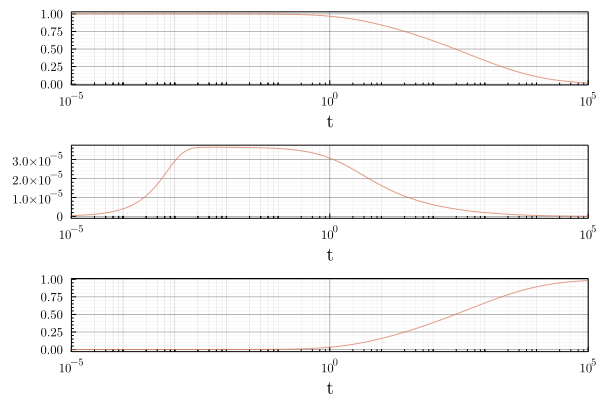

In [3]:
# Problem definition and reference solution

rober = @ode_def begin
  dy₁ = -k₁*y₁+k₃*y₂*y₃
  dy₂ =  k₁*y₁-k₂*y₂^2-k₃*y₂*y₃
  dy₃ =  k₂*y₂^2
end k₁ k₂ k₃
prob = ODEProblem(rober,[1.0,0.0,0.0],(0.0,1e5),(0.04,3e7,1e4))
sol = solve(prob,CVODE_BDF(),abstol=1/10^14,reltol=1/10^14)
test_sol = TestSolution(sol)
plot(sol, linewidth=1, layout=(3, 1), xscale=:log10, tspan=(1e-5, 1e5), legend=false)

## High Tolerances

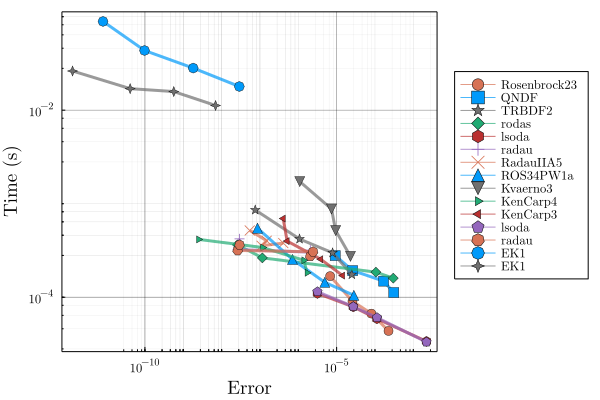

In [4]:
abstols = 1.0 ./ 10.0 .^ (5:8)
reltols = 1.0 ./ 10.0 .^ (1:4);
setups = [Dict(:alg=>Rosenbrock23()),
          Dict(:alg=>QNDF()),
          Dict(:alg=>TRBDF2()),
          Dict(:alg=>rodas()),
          Dict(:alg=>lsoda()),
          Dict(:alg=>radau()),
          Dict(:alg=>RadauIIA5()),
          Dict(:alg=>ROS34PW1a()),
          Dict(:alg=>Kvaerno3()),
          Dict(:alg=>KenCarp4()),
          Dict(:alg=>KenCarp3()),
          Dict(:alg=>lsoda()),
          Dict(:alg=>radau()),
          Dict(:alg=>EK1(order=3, smooth=false)),
          Dict(:alg=>EK1(order=5, smooth=false)),
          ]
wp = WorkPrecisionSet(prob,abstols,reltols,setups;
                      save_everystep=false,appxsol=test_sol,maxiters=Int(1e5),numruns=10)
plot(wp)

## Timeseries Errors

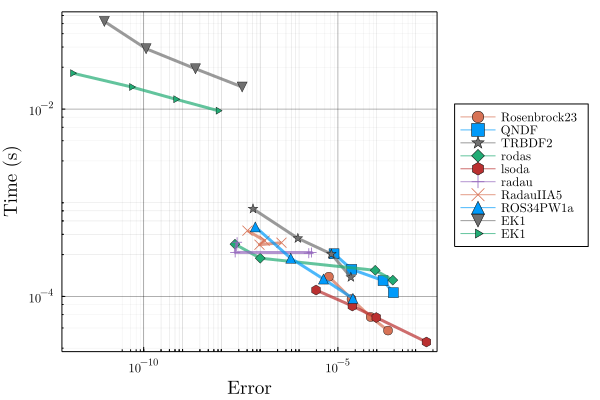

In [5]:
abstols = 1.0 ./ 10.0 .^ (5:8)
reltols = 1.0 ./ 10.0 .^ (1:4);
setups = [Dict(:alg=>Rosenbrock23()),
          Dict(:alg=>QNDF()),
          Dict(:alg=>TRBDF2()),
          Dict(:alg=>rodas()),
          Dict(:alg=>lsoda()),
          Dict(:alg=>radau()),
          Dict(:alg=>RadauIIA5()),
          Dict(:alg=>ROS34PW1a()),
          Dict(:alg=>EK1(order=3, smooth=false)),
          Dict(:alg=>EK1(order=5, smooth=false)),
          ]
wp = WorkPrecisionSet(prob,abstols,reltols,setups;error_estimate=:l2,
                      save_everystep=false,appxsol=test_sol,maxiters=Int(1e5),numruns=10)
plot(wp)

## Low Tolerances

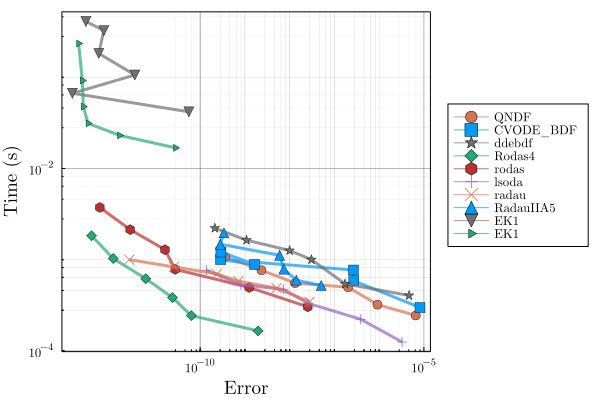

In [6]:
abstols = 1.0 ./ 10.0 .^ (7:12)
reltols = 1.0 ./ 10.0 .^ (4:9)

setups = [#Dict(:alg=>Rodas5()),
          Dict(:alg=>QNDF()),
          Dict(:alg=>CVODE_BDF()),
          Dict(:alg=>ddebdf()),
          Dict(:alg=>Rodas4()),
          Dict(:alg=>rodas()),
          Dict(:alg=>lsoda()),
          Dict(:alg=>radau()),
          Dict(:alg=>RadauIIA5()),
          Dict(:alg=>EK1(order=3, smooth=false)),
          Dict(:alg=>EK1(order=5, smooth=false)),
]
wp = WorkPrecisionSet(prob,abstols,reltols,setups;
                      save_everystep=false,appxsol=test_sol,maxiters=Int(1e5),numruns=10)
plot(wp)